# How can we make Machine Learning models interpretable?
Up to this point, I thought models are black boxes which are not possible to understand at all. That is not true apparently. Let's find out why.<br>

But why do we even care about knowing how the model is making predictions?
- Having insights into the model helps in debugging the preprocessing code because you avoid errors. 
- Doing informed Feature Engineering is a gift for creating advanced models.
- If you need more data, you can argue better with the people responsible when you have a good understanding of the relevant data.
- People make better decisions if they know the background of data, too.
- People feel trust in your model if you can explain how it works.

## Permutation Feature Importance

**How can we find out which features are the most important ones for the model?** <br> 
This question concerning the topic of feature importance can be answered by permutation importance. 
- Permutation importance is a technique used to evaluate the importance of features in a machine learning model. 
- It is important to note that the model has already been fitted to training data. 
- It's based on the idea of randomly permuting (shuffling) the values of a specific feature and observing how this impacts the model's performance. 

Procedure:
- For each feature in the validation dataset, the values of that feature are randomly shuffled.
- The model's predictions are then computed using this modified data.
- The difference in the model's performance (typically measured by a loss function or accuracy) between the original and shuffled data is used to assess the feature's importance.<br>

In [3]:
!pip install --upgrade eli5
# !pip install --upgrade scikit-learn

     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     ----- ------------------------------- 30.7/216.2 kB 330.3 kB/s eta 0:00:01
     -------------------- --------------- 122.9/216.2 kB 901.1 kB/s eta 0:00:01
     -------------------------------------- 216.2/216.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107768 sha256=48234f711a001ec8b767aa13c4ed4f15438f209099980f5c91753136bc7f32c9
  Stored in directory: c:\users\tobir\appdata\local\pip\cache\wheels\ec\68\a9\de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5
  Obtaining dependency information for scikit-learn from http

ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\tobiR\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
pip install scikit-learn==1.2.0

     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB 325.1 kB/s eta 0:00:26
     ---------------------------------------- 0.1/8.2 MB 558.5 kB/s eta 0:00:15
     -- ------------------------------------- 0.5/8.2 MB 3.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/8.2 MB 5.8 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.2 MB 7.5 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/8.2 MB 9.8 MB/s eta 0:00:01
     ------------------- -------------------- 3.9/8.2 MB 11.4 MB/s eta 0:00:01
     ------------------------ --------------- 5.1/8.2 MB 12.9 MB/s eta 0:00:01
     ----------------------------- ---------- 6.1/8.2 MB 13.8 MB/s eta 0:00:01
     ----------------------------------- ---- 7.2/8.2 MB 14.8 MB/s eta 0:00:01
     ---------------------------------------  8.2/8.2 MB 15.4 MB/s eta

ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\tobiR\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [4]:
# eli5 returned an ImportError
# fixed by downgrading the scikit-learn version
import sklearn
print(sklearn.__version__)

import eli5
print(eli5.__version__)

1.2.0
0.13.0


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('C:/Users/tobiR/OneDrive/Python/Machine_Learning/Kaggle_Projects/Machine_Learning_Explainability/FIFA 2018 Statistics.xls')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [2]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


**How can we interpret the results given out by the PermutationImportance package of scikit-learn?**

- The importance of a feature is quantified by a metric, often referred to as "weight" in scikit-learn's PermutationImportance package.
- A higher weight indicates a stronger feature. In other words, the model's performance significantly decreases when the feature is shuffled, indicating that the feature is important for making accurate predictions.
- A weight of 0 or less suggests that the feature has no meaningful impact on the model's performance. This means that shuffling the feature doesn't affect the model's predictions.
- The standard deviation measures the variability in the importance estimate due to the randomness introduced by shuffling. It reflects the fact that permutation importance is based on randomization and that different shuffling can yield slightly different results.
- Keep in mind that the specific metric used for evaluating performance, such as a decrease in accuracy or increase in a loss function, may vary depending on the context and the type of problem you're solving.

## Partial Dependence Plots

Permutation importance only answers the question, which features might be important for the prediction. Now, to understand **how** a feature affects the prediction, a method called Partial Dependence Plots is very helpful. As an example, we can take the probability of a team to get the man of the match award depending on the amount of goals scored.
- Again, the model has already been fit.
- The value of one column of the data is set to 0 goals scored for example and the average predicted outcome is saved. The predicted outcome is the probability of a team to get the man of the match award.
- Then, the value is changed to 1 goal, 2 goals and so on.
- The average predictions for each try are plotted over the according goals scored.

![Partial Dependence over Goals scored](partial_dependence_plot.png)

- It is also possible to see the relationship between 2 features by plotting the partial dependence in a diagram with the features on the 2 axes
![2D Partial Dependence](2D_partial_dependence.png)
You can see that the partial dependence doesn't increase further with distance covered over 103 km if more than 1 goal is scored.

A major disadvantage of partial dependence plots is that it assumes that the features are independent. This means that if two features are dependent on each other, changing one of the features might create an unrealistic dataset. For example, if you have a dataset with the columns "games won" and "games lost" and you set the column "games won" to 0 while keeping the "games lost" column constant, you run into a logical problem because some team has to have won games in order to maintain lost games in the dataset. So, only if no team hasn't played any game, yet, every team could have 0 games won.

It's essential to recognize this limitation of PDPs and exercise caution when interpreting PDPs, especially in situations where feature dependencies are known to exist. PDPs are more appropriate for features that are relatively independent or when you are primarily interested in understanding the isolated effect of a single feature.

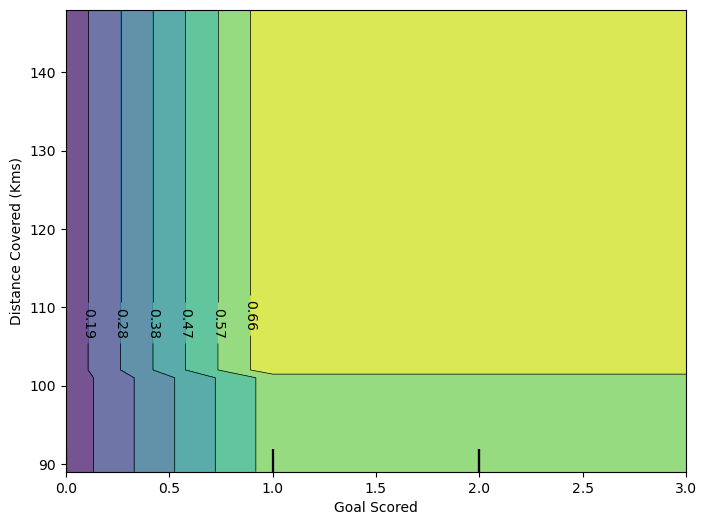

In [3]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Goal Scored', 'Distance Covered (Kms)')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(tree_model, val_X, f_names, ax=ax)
plt.show()

Task 7 was: Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high. We will use a RandomForest for the model.

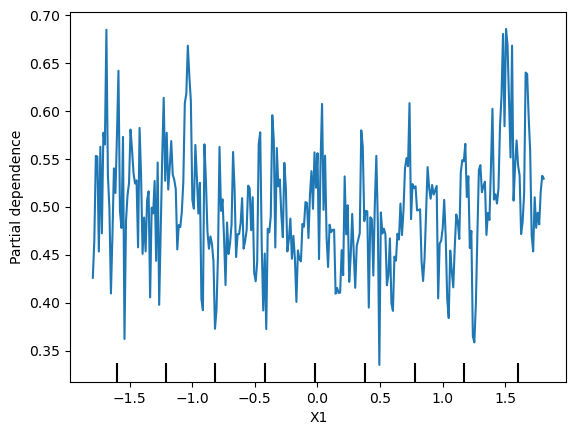

Weight,Feature
1.0650 ± 0.0157,X2
0.8255 ± 0.0172,X1


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from eli5.sklearn import PermutationImportance
import eli5
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

n_samples = 20000

""" 
# original solution
# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2

# Create y. you should have X1 and X2 in the expression for y
y = X1 * X2
"""

# chatgpt solution
# Create array holding predictive feature
X1 = 4 * np.random.rand(n_samples) - 2
X2 = np.random.rand(n_samples)

# Create y. The expression for y only contains X2 as noise
y = X2 + np.random.normal(0, 1, n_samples)

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

disp = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'], grid_resolution=300)
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])

This task should show that applying only one importance test alone can be misleading. From PDP, you might infer that the feature has no importance for the prediction of the model. With permutation importance added to the workflow, you can see contradicting information which has to be clarified. 

The key takeaway is that the PDP doesn't capture the importance of 'X1' in this scenario, as it only shows the marginal effect of 'X1' on the target variable while keeping other features constant. However, the permutation importance takes into account the interaction and dependence between features and the target, which might not be evident from the PDP alone.

## SHAP Values

Until now, we can only see how features affect the predictions in general. But sometimes, we would like to see specifically how our model came to a prediction for a certain data point. With SHapley Additive exPlanations (SHAP values), this is possible. SHAP values are used to explain how each feature affects the target of one individual prediction and the extent of their influence. This might be necessary for a bank to explain why they rejected a loan or to answer the question whether the prediction for winning the man of the match award was affected by the fact that the team scored 3 goals. We can compare the present situation with a baseline value to explain the effect and direction of the effect.<br>

Lets go through an example to make this more concrete:
- Suppose our model predicts the probability of winning the `Man of the Match` award for a particular team to be 0.75.
- Assume the baseline for goals scored is the average number of goals for all teams, which is 2.
- If the team scored 3 goals, the SHAP value for goals scored might be +0.1, indicating that scoring more goals than average increases the probability.
- This procedure can be done for all desired feature values and features. The deviation of the prediction for this situation and the average or baseline situation is equal to the sum of all SHAP values for all features. What that means can more easily be seen in the next plot.

![](shap_example.png)

**Interpretation**
- A positive SHAP value (red) means that the feature contributes positively to the prediction / increased the prediction.
- A negative SHAP value (blue) means that the feature contributes negatively to the prediction / decreased the prediction.
- The longer the bar, the stronger was the effect of the feature on the prediction.
- Here: 2 goals scored increased the prediction the most and a ball possession of 38 % decreased the prediction the most.
- The distance from the base value (0.50) to the output value (0.71) is equal to the deviation of the summed up red to blue bars. This is represented by this equation: `sum(SHAP values for all features) = pred_for_team - pred_for_baseline_values`.

### But how does it work?

SHAP values are based on game theory. In game theory, the question is how to fairly distribute a `joint payoff` according to the contribution of the `players` in a team. However, the players joined the team at different time points and have different skills. For that purpose, a `marginal contribution` of each player is calculated that considers their order of entry into the team. Based on that marginal contribution, a fair payoff for every player can be made.
In machine learning interpretability, the joint payoff represents the model's prediction for a specific instance or observation, the players stand for the features and the marginal contribution is the SHAP value.

Finally, lets find out how SHAP values are calculated:
1. Identify the set of all features used in your model
1. Enumerate all possible subsets (coalitions) of features. This corresponds to all possible combinations of features that might have an impact on the prediction.
1. For each coalition, create all possible permutations (orderings) of the features within that coalition. Each permutation represents a different order in which features are added to the model.


- to step 3: this mitigates the problem of improbable or unrealistic combinations of features

Here is a visualization of how this process looks like in general 

![](SHAP_visualization.jpg)

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('C:/Users/tobiR/OneDrive/Python/Machine_Learning/Kaggle_Projects/Machine_Learning_Explainability/FIFA 2018 Statistics.xls')

# create target variable with binary data (boolean)
y = (data['Man of the Match'] == "Yes")

# list with names of feature columns
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

# feature data
X = data[feature_names]

# training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# model training
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [7]:
# random row to show predicted probability of (not) winning award
row_to_show = 5

# series with feature data
data_for_prediction = val_X.iloc[row_to_show]

# prepared array for probability prediction
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# probability prediction
my_model.predict_proba(data_for_prediction_array)

C:\Users\tobiR\anaconda3\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

This output means that the probability of the team in this row to win the man of the match award is 71 % whereas the opposite event is only occuring with 29 % probability.

We can now look at the reason for this prediction by using the shap package. 

In [9]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/447.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 9.3 MB/s eta 0:00:00


In [10]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values for the chosen data
shap_values = explainer.shap_values(data_for_prediction)

# initialize JavaScript visualization in Jupyter Notebook
shap.initjs()

# visualize SHAP values for the positive prediction of this row
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)


In the next example, we would like to know if a patient will be readmitted after their discharge from the hospital. A hospital wants us to create a function `patient_risk_factors` that does the following:

- Takes a single row with patient data (of the same format as your raw data)
- Creates a visualization showing what features of that patient increased their risk of readmission, what features decreased it, and how much those features mattered.

In [12]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('C:/Users/tobiR/OneDrive/Python/Machine_Learning/Kaggle_Projects/Machine_Learning_Explainability/hospital_readmissions.csv')

# Extract the target variable (readmission status)
y = data.readmitted

# Define the features excluding the target variable
base_features = [c for c in data.columns if c != "readmitted"]

# Extract the feature matrix
X = data[base_features]

# Split the dataset into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Train a Random Forest Classifier
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

def patient_risk_factors(patient_data, model, explainer):
    """
    Visualize the factors influencing the readmission risk for a single patient.

    Parameters:
    - patient_data: A single row of patient data (DataFrame or array-like).
    - model: The machine learning model used for prediction.
    - explainer: The SHAP explainer object.

    Returns:
    - A visualization showing the impact of features on readmission risk for the patient.
    """
    import shap

    # Create a DataFrame with column names for better visualization
    patient_df = pd.DataFrame([patient_data], columns=data.columns)

    # Calculate SHAP values
    shap_values = explainer.shap_values(patient_df)

    # Initialize SHAP JavaScript visualization
    shap.initjs()

    # Create a force plot for the positive class (readmission)
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient_df)

# Create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(my_model)

# Select a single patient's data from the validation set
patient_data = val_X.iloc[0, :]

# Visualize the factors influencing the readmission risk for the selected patient
patient_risk_factors(patient_data, my_model, explainer)


In the positive case that the patient is readmitted (not positive for them though), the probability was only 27 % compared to the base value at around 45 %. 
- We can see what is the reason for this low probability. Mostly, the number of procedures, number of inpatient procedures and the time in hospital seem to have lowered the probability by applying a negative effect. 
- Whereas, the number of diagnoses and their age have increased their probability to be readmitted with a positive effect. 

You can see that SHAP is a very valuable and powerful tool that let's you see the which factors in the data pushed the prediction to its value and how strong they are. It can be used for single predictions but also for all values of a feature.

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

data = pd.read_csv('C:/Users/tobiR/OneDrive/Python/Machine_Learning/Kaggle_Projects/Machine_Learning_Explainability/hospital_readmissions.csv')
y = data.readmitted
base_features = ['number_inpatient', 'num_medications', 'number_diagnoses', 'num_lab_procedures', 
                 'num_procedures', 'time_in_hospital', 'number_outpatient', 'number_emergency', 
                 'gender_Female', 'payer_code_?', 'medical_specialty_?', 'diag_1_428', 'diag_1_414', 
                 'diabetesMed_Yes', 'A1Cresult_None']

# Some versions of shap package error when mixing bools and numerics
X = data[base_features].astype(float)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# For speed, we will calculate shap values on smaller subset of the validation data
small_val_X = val_X.iloc[:150]
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

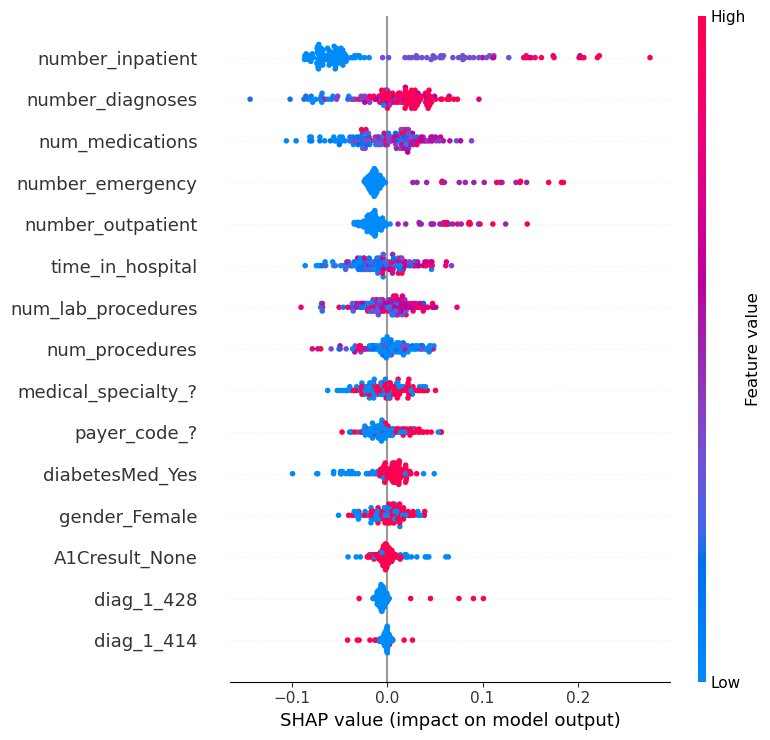

In [14]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(small_val_X)

shap.summary_plot(shap_values[1], small_val_X)

Here, we see the features over the SHAP values for a lot of data points. Blue dots mean low feature values while red dots express high values. For example for number of inpatient procedures, higher feature values indicate a positive impact on the output of the model. However, many features aren't that simple to interpret, like time spent in hospital.

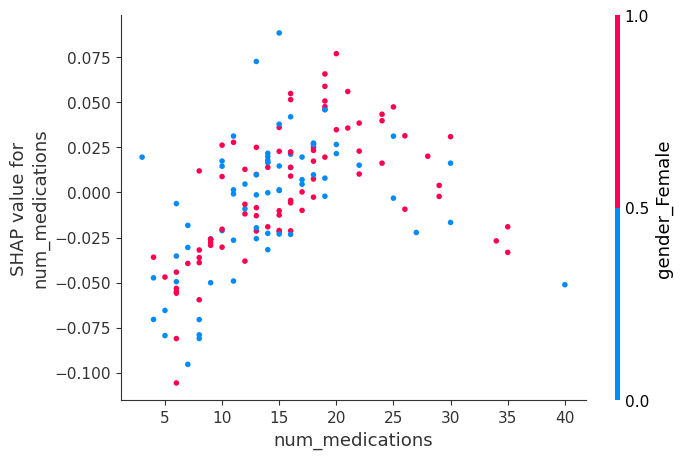

In [15]:
shap.dependence_plot('num_medications', shap_values[1], small_val_X, interaction_index="gender_Female")

In this diagram, we see the SHAP values for a single feature together with another feature visualized by color. By using this type of diagram, we can detect interactions with other features which offers us insights into the connection of the data to get a better understanding of it.